In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("boston.csv")

In [2]:
# Display basic info and first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Data Cleaning

In [3]:
# Check for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Splitting the Data For Training

In [4]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# Split into training(80%) and testing(20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the new datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

# Applying Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# Initialize the model
model = LinearRegression()

In [7]:
# Train (fit) the model using the training data.
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Get model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept

(array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
        -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
         2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]),
 30.24675099392388)

In [12]:
# Make prediction
y_pred = model.predict(X_test)
y_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

# Evaluate the model

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

mse= mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  24.29111947497374
R2 Score:  0.6687594935356289


# Visualization

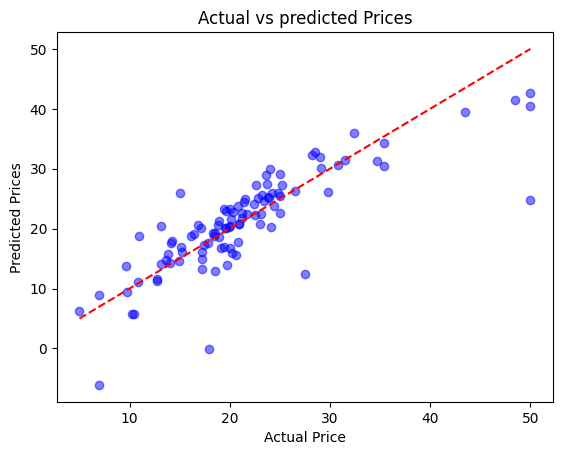

In [18]:
import matplotlib.pyplot as plt

#Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual vs predicted Prices")
plt.show()

# Residual Plot

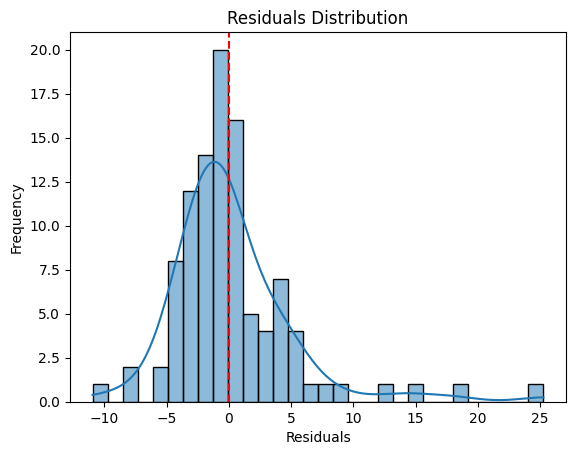

In [19]:
import seaborn as sns 

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color="red", linestyle="dashed")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show() 

# Feature Importance (Coefficients Bar Plot)

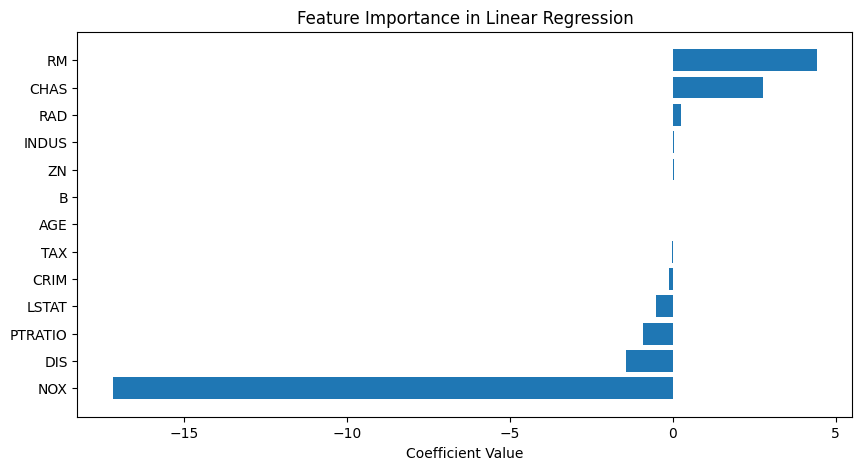

In [20]:
import numpy as np

# Feature importance plot
plt.figure(figsize=(10, 5))
features = X.columns
importance = model.coef_

# Sort features by importance
indices = np.argsort(importance)

plt.barh(range(len(features)), importance[indices], align="center")
plt.yticks(range(len(features)), np.array(features)[indices])
plt.xlabel("Coefficient Value")
plt.title("Feature Importance in Linear Regression")
plt.show()
